# 🧠🤖 Perceptron: Estrutura, Algoritmo de Treinamento e Intuição Geométrica

Este notebook explica: 

- Estrutura do Perceptron
- Algoritmo de treinamento clássico
- Intuição geométrica
- Demonstração da convergência do algoritmo


## Definições Básicas

O trabalho original de McCulloch e Pitts enfocou o modelamento de um neurônio biológico e sua capacidade computacional através da apresentação de vários exemplos de topologias de rede com capacidade de executar de funções Booleanas. Contudo, estes modelos não eram dotados de um algoritmo de treinamento. Foi somente com o trabalho de Frank Rosenblatt em 1958 que o conceito de aprendizado em RNAs foi introduzido. 

O modelo proposto por Rosenblatt, conhecido como Perceptron era composto por:
- uma estrutura de rede tendo como unidades básicas nós do MCP e 
- uma regra de aprendizado. 

Alguns anos mais tarde, Rosenblatt demonstrou o teorema de convergência do perceptron, o qual mostra que um nodo MCP treinado com o algoritmo de aprendizado do perceptron sempre converge, caso o problema em questão seja linearmente separável.


## Topologia

A topologia original descrita por Rosenblatt era composta por unidades de entrada (retina), por um nível intermediário formado pelas unidades de associação e por um nível de saída formado pelas unidades de resposta. Embora esta topologia original possua três níveis, ela é conhecida como perceptron de uma única camada, já que **somente o nível de saída (unidades de resposta) possui propriedades adaptativas (era treinada)**. A retina consiste basicamente de unidades sensoras, sendo que as unidades intermediárias de associação, embora sejam formadas por nodos MCP, possuem pesos fixos, definidos antes do período de treinamento. 

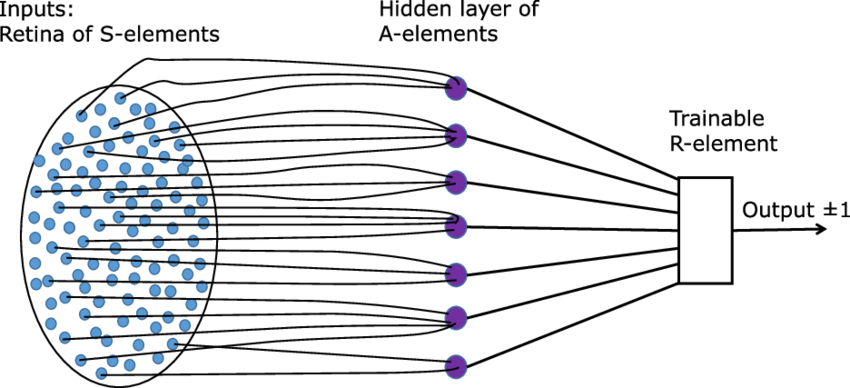

## Algoritmo de Treinamento 

De uma maneira geral, durante o processo de adaptação, ou aprendizado, o que se deseja obter é o valor do incremento $Δw$ a ser aplicado ao vetor de pesos $w$ de forma tal que o seu valor atualizado $w(t+1) = w(t) + Δw$ esteja mais próximo da solução desejada do que $w(t)$. Portanto, os algoritmos de aprendizado em RNAs visam ao desenvolvimento de técnicas para a obtenção do vetor de $Δw$ mais apropriado para a obtenção da solução do problema em questão.

Para relembrar, em um neurônio MCP, a sua ativação é dada por $y = f(w'^T x')$, onde $w'^T x'$ representa o produto interno entre pesos $w'$ e entrada $x'$. Consequentemente, a condição crítica de disparo do nodo é $w'^T x' = θ$. $w'^T x' - θ = 0$, o que é equivalente a se adicionar um peso com valor $-θ$ às entradas do nodo e conectá-lo a uma entrada com valor fixo $x'_0 = 1$. A nova condição crítica de disparo passa então a ser $w^T x = 0$, onde $w = [-θ, w'_1, w'_2, ..., w'_n]^T$ e $x = [1, x'_1, x'_2, ..., x'_n]^T$.

Considere agora o par de treinamento $(x, y)$ para um nodo arbitrário da rede, onde $x$ é o vetor de entrada do nodo e $d$ a saída desejada para a entrada $x$. A saída atual da rede será chamada simplesmente de $p$, podendo-se então definir-se o erro devido à saída atual como sendo $e = d - y$. Para o caso do perceptron, tem-se sempre que $p ∈ \{0, 1\}$ e $y ∈ \{0, 1\}$, podendo, portanto, haver apenas duas situações possíveis para as quais $e \neq 0$: $y = 1$ e $p = 0$ ou $y = 0$ e $p = 1$.

Para a primeira situação ($y=1$ e $p=0$), tem-se que $e=1$ e $w^T x < 0$, já que $p = 0$, o que implica que $||w|| \cdot ||x|| cos(w, x) < 0$. Consequentemente, tem-se que $cos(w, x) < 0$ ⇒ $α(w, x) > 90°$, onde $α$ é o ângulo entre os vetores $w$ e $x$. Para esta condição, pode-se observar que uma modificação plausível no vetor $w$ em busca da solução seria somar-se a um vetor que estivesse na direção de $x$ como o vetor $ηx$. Assim, $Δw = ηx$ e $w(t+1) = w(t) + ηx$. Porém, como $e=1$, a equação de atualização de $w$ pode ser escrita de uma forma mais conveniente: $w(t+1) = w(t) + ηex$. A constante $η > 0$ é uma medida da rapidez com que o vetor de pesos será atualizado, sendo comumente chamada de **taxa de aprendizado**. Para valores pequenos de $η$, algumas iterações podem ser necessárias para se chegar à solução.

Para a segunda situação em que $y=0$ e $p=1$, pode-se obter a regra de atualização do vetor de pesos de maneira análoga à situação anterior. Para este caso, tem-se então $e = -1$ e $w^T x > 0$, o que implica que $α(w, x) < 90°$. Para que $y = 0$, o vetor de pesos deve ser modificado de forma tal que se obtenha $α(w, x) > 90°$. Consequentemente, uma regra de atualização plausível para este caso seria $w(t+1) = w(t) - ηx$. Como $e = -1$ para este caso, a regra de atualização pode ser escrita também na forma $w(t+1) = w(t) + ηex$. Para as duas situações possíveis ($y = 1$ e $p = 0$ ou $y = 0$ e $p = 1$) chegou-se à mesma expressão para a regra de atualização dos pesos, que pode então ser escrita como a equação geral para atualização dos pesos de um nodo de um perceptron simples:

$w(t+1) = w(t) + ηex(t)$ 



### Pseudocódigo



Dado um conjunto de dados rotulados $ \{(\mathbf{x}_i, y_i)\}_{i=1}^m $, onde $ y_i \in \{0, 1\} $, o algoritmo segue:

1. Inicializar $ \mathbf{w} $ e $ b $
2. Para cada época (até convergir):
   - Para cada exemplo $ (\mathbf{x}_i, y_i) $:
     - $p_i = MCP(x_i) $
     - $e = y_i - p_i $:
       - Atualizar pesos $w(t+1) = w(t) + ηex(t)$
       - Atualizar bias $b(t+1) = b(t) + ηe$ 

Note que este algoritmo ajusta os pesos apenas quando a predição está incorreta.


## Intuição Geométrica


O vetor de pesos $ \mathbf{w} $ define um hiperplano $ \mathbf{w}^T \mathbf{x} + b = 0 $ que separa o espaço de entrada.

Cada atualização de pesos move o hiperplano em direção ao ponto mal classificado, reduzindo o erro. Intuitivamente, o algoritmo "empurra" o plano para que ele separe corretamente os dados.

Se os dados forem linearmente separáveis, o Perceptron encontrará um hiperplano que os separa perfeitamente.


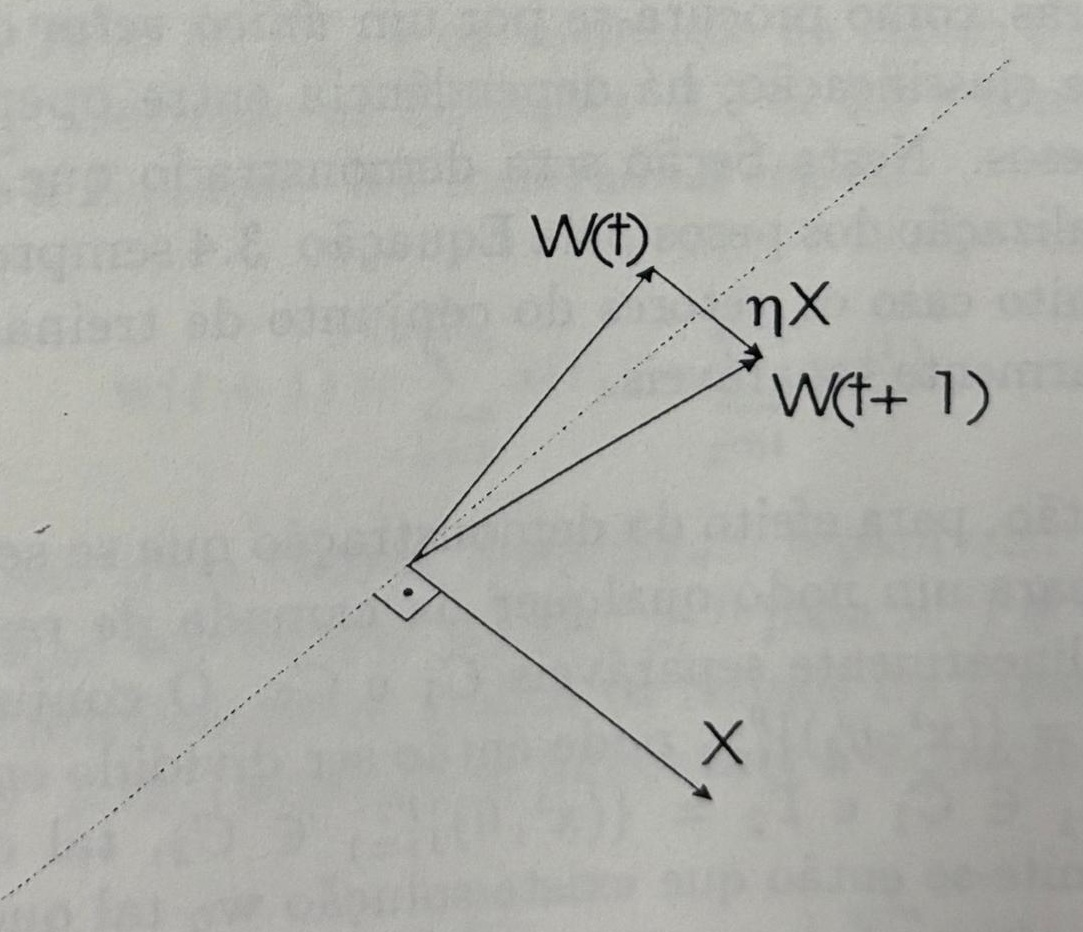

## Implementação

In [ ]:

import numpy as np

class Perceptron:
    def __init__(self, initial_weights, initial_bias):
        self._weights = initial_weights
        self._bias = initial_bias

    def train(self, X: np.ndarray, y: np.ndarray, lr: float, epochs: int):
        n_samples, n_features = X.shape

        history = [{"weights": self._weights, "bias": self._bias, "update": 0}]

        for epoch_idx in range(epochs): # repeticao por um numero de epocas
            sum_updates = []
            for idx, x_i in enumerate(X): # iteracao pelas amostras do dataset
                # predicao da saida para a amostra x_i
                y_predicted = self.forward(x_i)
                # calculo do erro
                error = y[idx] - y_predicted
                # atualizacao dos parametros
                self._weights += lr * error * x_i
                self._bias += lr * error
                # salvamos dados para visualizacao depois
                sum_updates.append(update)

            predictions = np.array([self.forward(sample) for sample in X])
            acc = np.mean(predictions == y)
            print("epoch", epoch_idx, "acc: ", acc)
            history.append({"weights": self._weights.copy(), "bias": self._bias.copy(), "update": np.sum(np.abs(sum_updates))})

        return history

    def forward(self, x):
        linear_output = np.sum(np.multiply(x, self._weights)) + self._bias

        if linear_output >= 0:
            return 1
        else:
            return 0

# Dados de exemplo
X = np.array([[3.5, 4.25],
            [4, 3],
            [4, 4],
            [4.5, 1.75],
            [4.9, 4.5],
            [5, 4],
            [5.5, 2.5],
            [5.5, 3.5],
            [0.5, 1.5],
            [1, 2.5],
            [1.25, 0.5],
            [1.5, 1.5],
            [2, 2],
            [2.5, 0.75]])

y = np.array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

# # Treinando o Perceptron
perceptron = Perceptron(np.zeros(2), 2)
history = perceptron.train(X, y, lr=0.5, epochs=30)


# acuracia apos o treinamento
predictions = [perceptron.forward(sample) for sample in X]
acc = np.mean(predictions == y)
print(f"Training Accuracy: {acc: .3f}")

epoch 0 acc:  0.42857142857142855
epoch 1 acc:  0.42857142857142855
epoch 2 acc:  0.42857142857142855
epoch 3 acc:  0.42857142857142855
epoch 4 acc:  0.42857142857142855
epoch 5 acc:  0.42857142857142855
epoch 6 acc:  0.8571428571428571
epoch 7 acc:  0.42857142857142855
epoch 8 acc:  0.42857142857142855
epoch 9 acc:  0.5
epoch 10 acc:  0.5714285714285714
epoch 11 acc:  0.6428571428571429
epoch 12 acc:  0.7142857142857143
epoch 13 acc:  0.7857142857142857
epoch 14 acc:  0.7857142857142857
epoch 15 acc:  0.8571428571428571
epoch 16 acc:  0.9285714285714286
epoch 17 acc:  0.9285714285714286
epoch 18 acc:  0.9285714285714286
epoch 19 acc:  1.0
epoch 20 acc:  1.0
epoch 21 acc:  1.0
epoch 22 acc:  1.0
epoch 23 acc:  1.0
epoch 24 acc:  1.0
epoch 25 acc:  1.0
epoch 26 acc:  1.0
epoch 27 acc:  1.0
epoch 28 acc:  1.0
epoch 29 acc:  1.0
Training Accuracy:  1.000


A célula abaixo exibe a evolução da fronteira de decisão ao longo do treinamento do Perceptron.

*Pode demorar um pouco para executar até o final.*

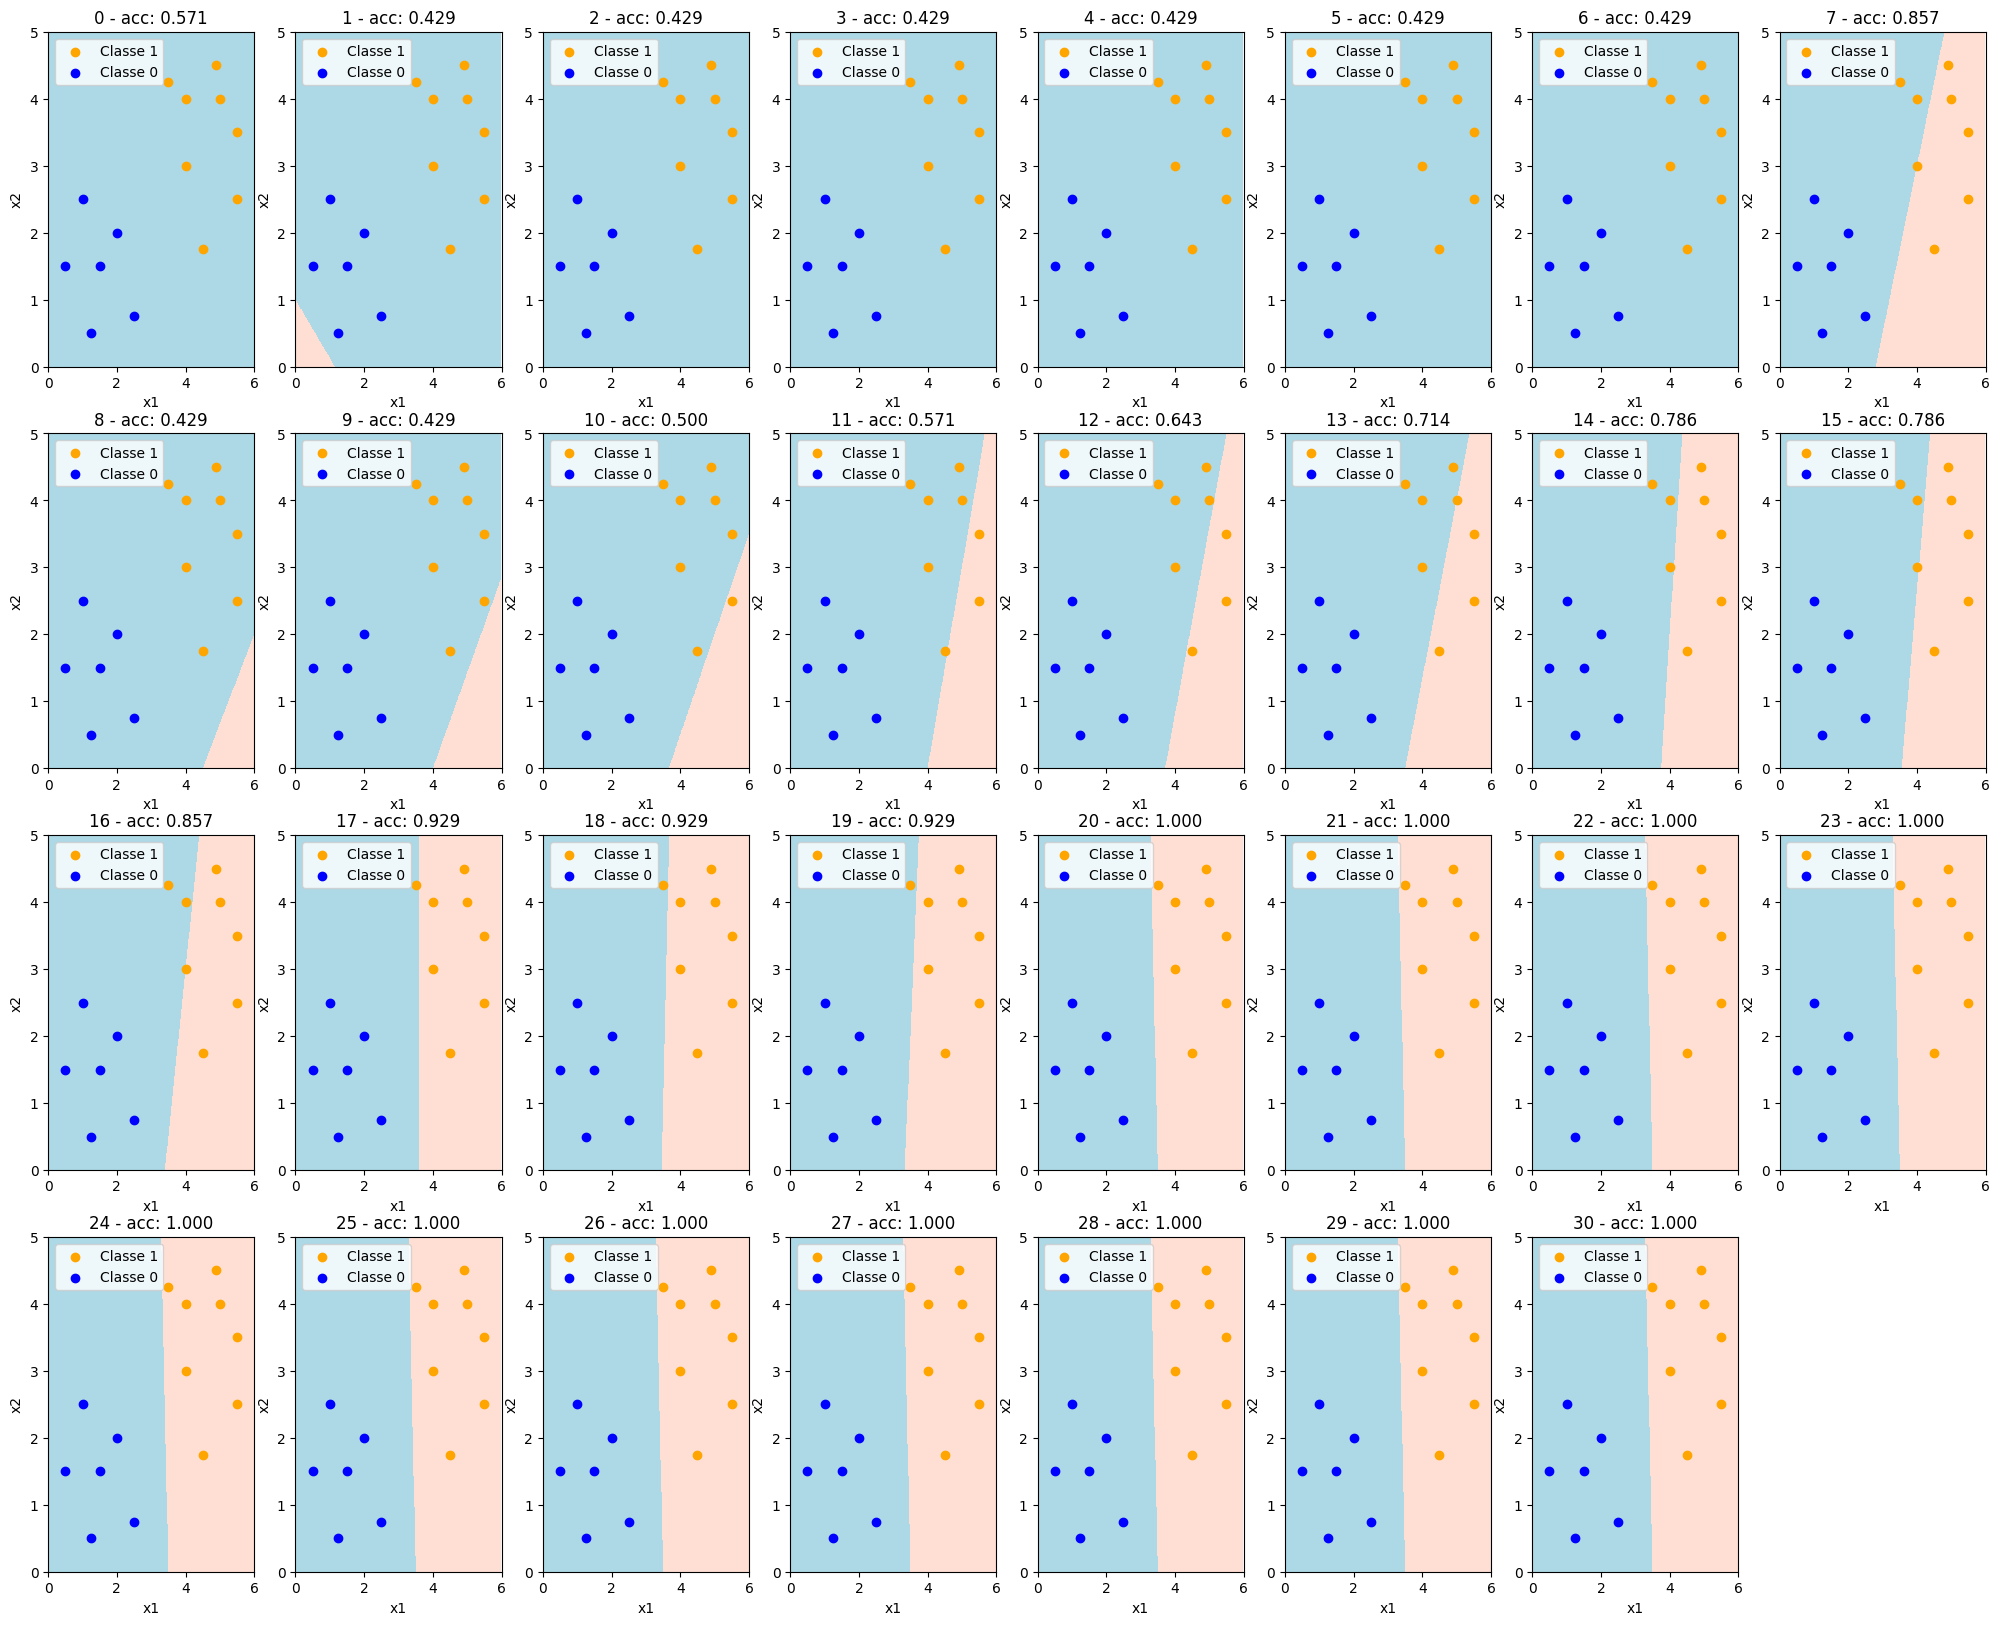

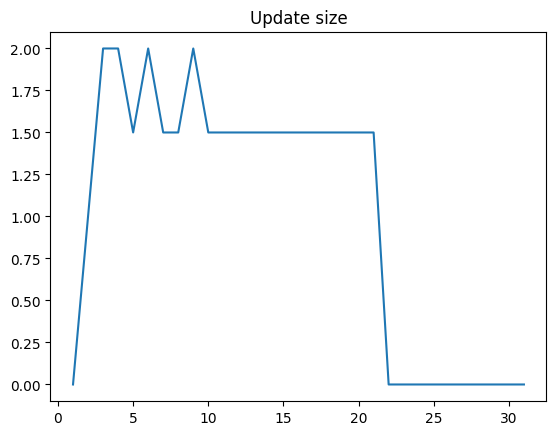

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


def draw_classification_region(X, y, perceptron):
    cmap_light = ListedColormap(['#ADD8E6', '#AAFFAA', '#ffdfd4'])

    h = .01

    x_min = X[:, 0].min() - 0.5
    x_max = X[:, 0].max() + 0.5
    y_min = X[:, 1].min() - 0.5
    y_max = X[:, 1].max() + 0.5

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))

    Z = np.array([perceptron.forward([x1, x2]) for x1, x2 in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)

    plt.pcolormesh(xx, yy, Z, cmap = cmap_light, shading = 'auto')

    plt.scatter(X[y == 1, 0], X[y == 1, 1], color = 'orange', label = 'Classe 1')
    plt.scatter(X[y == 0, 0], X[y == 0, 1], color = 'blue', label = 'Classe 0')

    plt.xlabel('x1')
    plt.ylabel('x2')

    plt.xlim((x_min, x_max))
    plt.ylim((y_min, y_max))
    plt.legend(loc = 'best');


plt.figure(figsize=(25, 20))
for idx, epoch_data in enumerate(history):
    perceptron._weights = epoch_data["weights"]
    perceptron._bias = epoch_data["bias"]
    predictions = np.array([perceptron.forward(x) for x in X])
    accuracy = np.mean(predictions == y)
    plt.subplot(4, 8, idx + 1)
    plt.title(f"{idx} - acc: {accuracy:.3f}")
    draw_classification_region(X, y, perceptron)


plt.figure()
plt.title("Update size")
epochs_ids = np.array(range(len(history))) + 1
update_size = [np.sum(e["update"]) for e in history]
plt.plot(epochs_ids, update_size)
plt.show()